### Logistic Regression

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = pd.read_csv("bal_hr_data.csv")
df


,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0,0.45,0.46,2,130,3,0,1,0,technical,low
1,1,0.63,0.66,3,256,4,1,0,0,RandD,low
2,2,0.12,0.47,3,258,5,0,0,0,sales,medium
3,3,0.89,0.87,5,225,5,0,1,0,product_mng,low
4,4,0.81,0.95,5,238,6,0,1,0,technical,low
...,...,...,...,...,...,...,...,...,...,...,...
7166,7166,0.14,0.38,5,115,6,1,0,0,marketing,high
7167,7167,0.84,0.59,3,234,2,0,0,0,sales,medium
7168,7168,0.94,0.74,4,224,5,0,0,0,sales,low
7169,7169,0.83,0.92,4,255,5,0,1,0,accounting,low


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7171 non-null   int64  
 1   satisfaction_level     7171 non-null   float64
 2   last_evaluation        7171 non-null   float64
 3   number_project         7171 non-null   int64  
 4   average_montly_hours   7171 non-null   int64  
 5   time_spend_company     7171 non-null   int64  
 6   Work_accident          7171 non-null   int64  
 7   left                   7171 non-null   int64  
 8   promotion_last_5years  7171 non-null   int64  
 9   Department             7171 non-null   object 
 10  salary                 7171 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 616.4+ KB


In [183]:
df.isnull().sum()

Unnamed: 0               0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

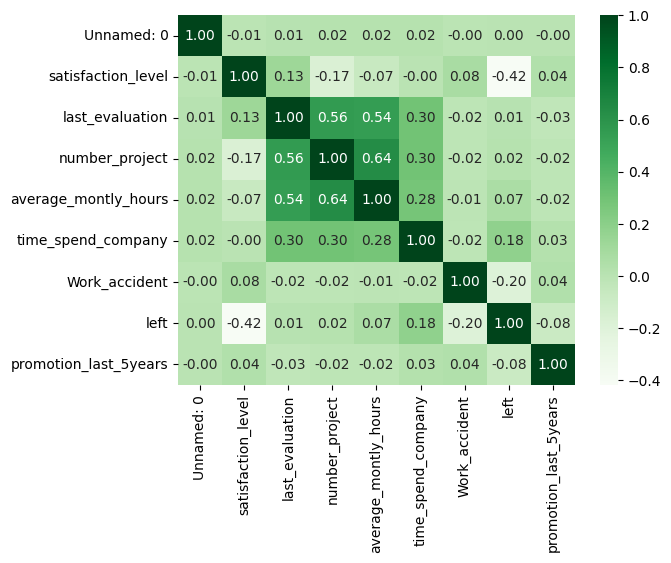

In [184]:
sns.heatmap(df.corr(numeric_only=True), annot =True, fmt ='0.2f',cmap='Greens')
plt.show()

In [185]:
df = df.drop(['Unnamed: 0','last_evaluation','number_project'],axis =1)
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.45,130,3,0,1,0,technical,low
1,0.63,256,4,1,0,0,RandD,low
2,0.12,258,5,0,0,0,sales,medium
3,0.89,225,5,0,1,0,product_mng,low
4,0.81,238,6,0,1,0,technical,low
...,...,...,...,...,...,...,...,...
7166,0.14,115,6,1,0,0,marketing,high
7167,0.84,234,2,0,0,0,sales,medium
7168,0.94,224,5,0,0,0,sales,low
7169,0.83,255,5,0,1,0,accounting,low


In [186]:
df.columns

Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')

In [187]:
df['salary'].value_counts()


salary
low       3819
medium    2920
high       432
Name: count, dtype: int64

In [188]:
# sd - salary department

sd = {'low':1,'medium':2,'high':3}

In [189]:
df['salary_num']  =df['salary'].map(sd)
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.45,130,3,0,1,0,technical,low,1
1,0.63,256,4,1,0,0,RandD,low,1
2,0.12,258,5,0,0,0,sales,medium,2
3,0.89,225,5,0,1,0,product_mng,low,1
4,0.81,238,6,0,1,0,technical,low,1
...,...,...,...,...,...,...,...,...,...
7166,0.14,115,6,1,0,0,marketing,high,3
7167,0.84,234,2,0,0,0,sales,medium,2
7168,0.94,224,5,0,0,0,sales,low,1
7169,0.83,255,5,0,1,0,accounting,low,1


In [190]:
df['Department'].value_counts()

Department
sales          1971
technical      1354
support        1098
IT              551
product_mng     418
marketing       399
hr              395
accounting      391
RandD           326
management      268
Name: count, dtype: int64

In [191]:
df = pd.get_dummies(columns=['Department'],data=df,drop_first=True,dtype =int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      7171 non-null   float64
 1   average_montly_hours    7171 non-null   int64  
 2   time_spend_company      7171 non-null   int64  
 3   Work_accident           7171 non-null   int64  
 4   left                    7171 non-null   int64  
 5   promotion_last_5years   7171 non-null   int64  
 6   salary                  7171 non-null   object 
 7   salary_num              7171 non-null   int64  
 8   Department_RandD        7171 non-null   int64  
 9   Department_accounting   7171 non-null   int64  
 10  Department_hr           7171 non-null   int64  
 11  Department_management   7171 non-null   int64  
 12  Department_marketing    7171 non-null   int64  
 13  Department_product_mng  7171 non-null   int64  
 14  Department_sales        7171 non-null   

In [192]:
df = df.drop(['salary'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      7171 non-null   float64
 1   average_montly_hours    7171 non-null   int64  
 2   time_spend_company      7171 non-null   int64  
 3   Work_accident           7171 non-null   int64  
 4   left                    7171 non-null   int64  
 5   promotion_last_5years   7171 non-null   int64  
 6   salary_num              7171 non-null   int64  
 7   Department_RandD        7171 non-null   int64  
 8   Department_accounting   7171 non-null   int64  
 9   Department_hr           7171 non-null   int64  
 10  Department_management   7171 non-null   int64  
 11  Department_marketing    7171 non-null   int64  
 12  Department_product_mng  7171 non-null   int64  
 13  Department_sales        7171 non-null   int64  
 14  Department_support      7171 non-null   

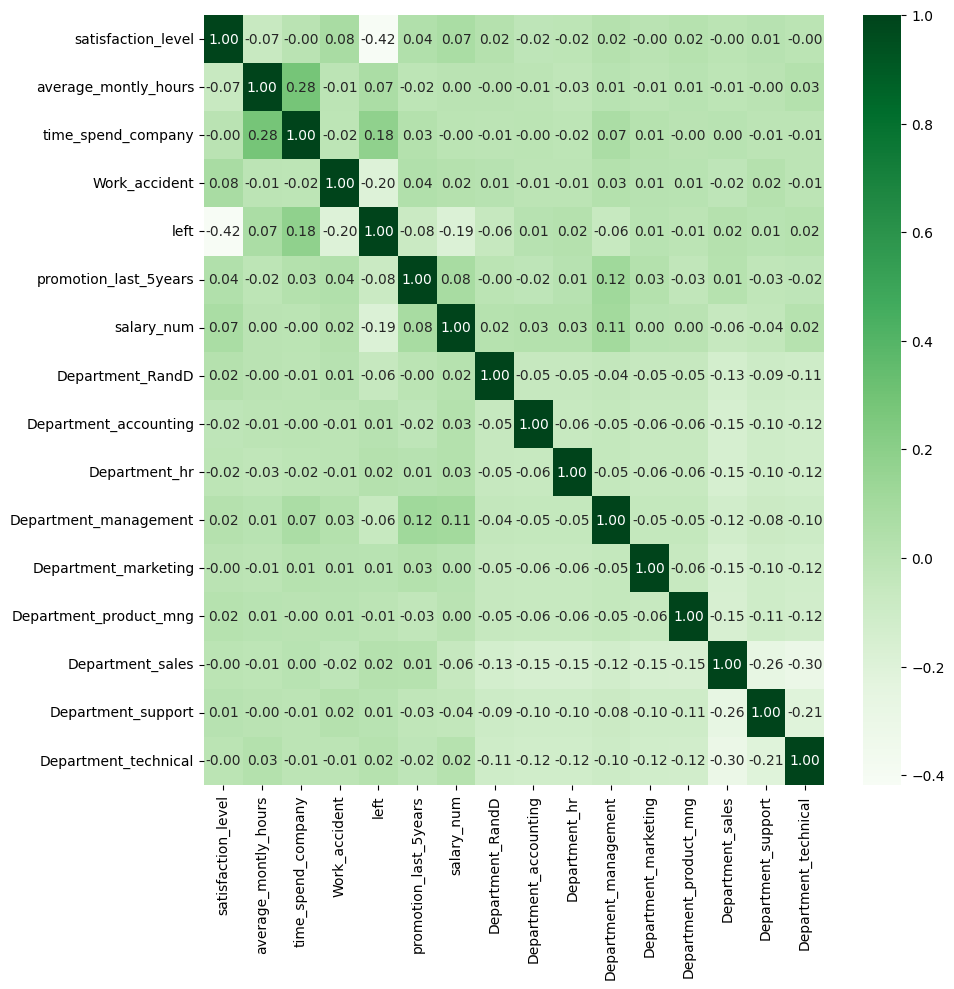

In [193]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,fmt ='0.2f',cmap = 'Greens')
plt.show()

In [194]:
# divide the data into x(independent) and y(dependent)
x = df.drop(['left'],axis=1)
y = df['left']

In [195]:
df['left'].value_counts(normalize=True)

left
0    0.502022
1    0.497978
Name: proportion, dtype: float64

In [196]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.8,random_state=4105,stratify =y)

In [197]:
print('x_train = ',x_train.shape)
print('x_test =',x_test.shape)

x_train =  (5736, 15)
x_test = (1435, 15)


In [198]:
y_train.value_counts(normalize = True)

left
0    0.502092
1    0.497908
Name: proportion, dtype: float64

In [199]:
# import of model
from sklearn.linear_model import LogisticRegression

In [200]:
lr_log = LogisticRegression(n_jobs=2)

In [201]:
lr_log.fit(x_train,y_train)

LogisticRegression(n_jobs=2)

In [202]:
lr_log.score(x_train,y_train)

0.7440725244072525

In [203]:
y_pred = lr_log.predict(x_test)

In [204]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

### NEW DATASET 

In [205]:
### new model
df = pd.read_csv('HR_comma_sep.csv')

In [206]:
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [208]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<Axes: >

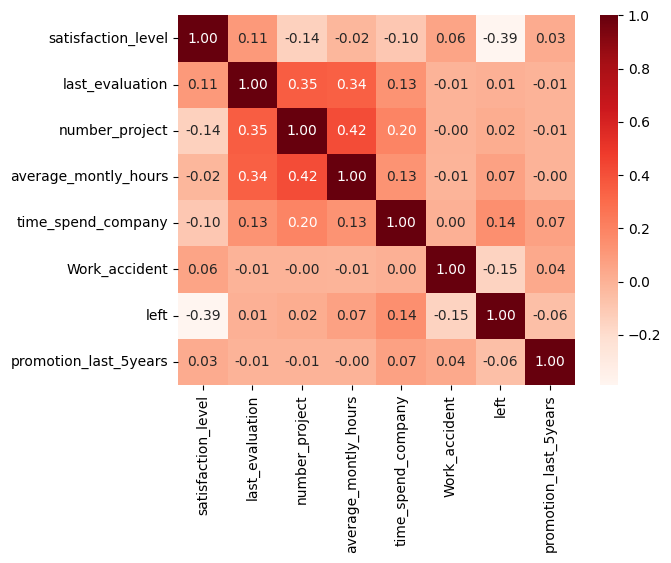

In [209]:
sns.heatmap(df.corr(numeric_only = True), annot = True , fmt = '0.2f' ,cmap = 'Reds')

In [210]:
df = df.drop(['last_evaluation','number_project'], axis = 1)

In [211]:
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low
14995,0.37,160,3,0,1,0,support,low
14996,0.37,143,3,0,1,0,support,low
14997,0.11,280,4,0,1,0,support,low


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   average_montly_hours   14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   Work_accident          14999 non-null  int64  
 4   left                   14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   Department             14999 non-null  object 
 7   salary                 14999 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 937.6+ KB


In [213]:
df.columns

Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')

In [214]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [215]:
# sd - salary department
sd= {'low':1,'medium':2,'high':3}

In [216]:
df['salary_num'] = df['salary'].map(sd)
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,157,3,0,1,0,sales,low,1
1,0.80,262,6,0,1,0,sales,medium,2
2,0.11,272,4,0,1,0,sales,medium,2
3,0.72,223,5,0,1,0,sales,low,1
4,0.37,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low,1
14995,0.37,160,3,0,1,0,support,low,1
14996,0.37,143,3,0,1,0,support,low,1
14997,0.11,280,4,0,1,0,support,low,1


In [217]:
df['Department'].value_counts()


Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [218]:
df = pd.get_dummies(columns=['Department'], data=df,drop_first= True, dtype = int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   salary                  14999 non-null  object 
 7   salary_num              14999 non-null  int64  
 8   Department_RandD        14999 non-null  int64  
 9   Department_accounting   14999 non-null  int64  
 10  Department_hr           14999 non-null  int64  
 11  Department_management   14999 non-null  int64  
 12  Department_marketing    14999 non-null  int64  
 13  Department_product_mng  14999 non-null  int64  
 14  Department_sales        14999 non-null

In [219]:
df = df.drop(['salary'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   salary_num              14999 non-null  int64  
 7   Department_RandD        14999 non-null  int64  
 8   Department_accounting   14999 non-null  int64  
 9   Department_hr           14999 non-null  int64  
 10  Department_management   14999 non-null  int64  
 11  Department_marketing    14999 non-null  int64  
 12  Department_product_mng  14999 non-null  int64  
 13  Department_sales        14999 non-null  int64  
 14  Department_support      14999 non-null

<Axes: >

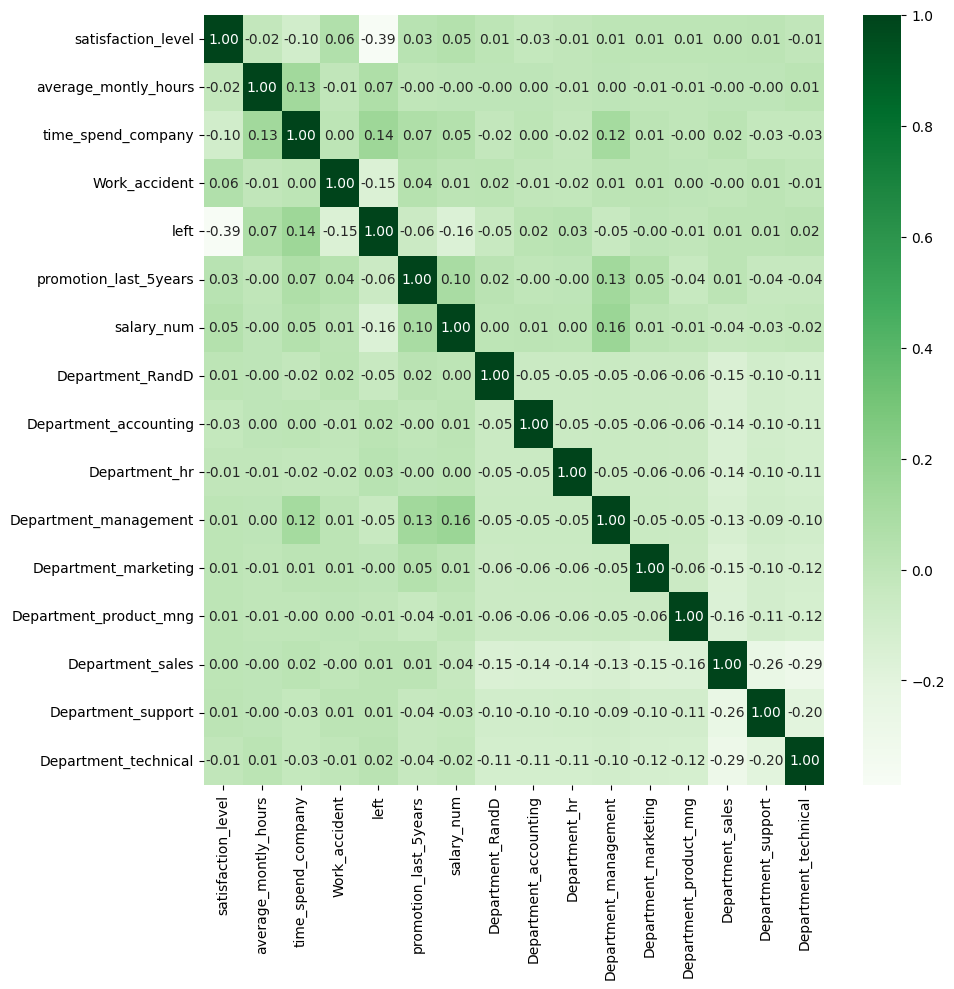

In [220]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True , fmt = '0.2f' , cmap = 'Greens')

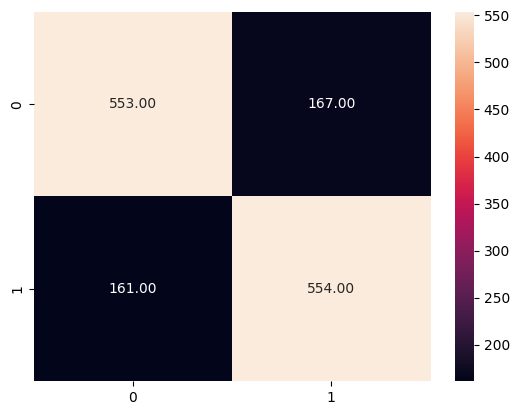

In [221]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '0.2f')
plt.show()

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       720
           1       0.77      0.77      0.77       715

    accuracy                           0.77      1435
   macro avg       0.77      0.77      0.77      1435
weighted avg       0.77      0.77      0.77      1435



In [223]:
# divide the data into x (independent) and y (dependent)
x = df.drop(['left'],axis = 1)
y = df['left']

In [224]:
df['left'].value_counts(normalize = True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [225]:
## split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=4105,stratify=y)

In [226]:
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)

x_train = (11999, 15)
x_test = (3000, 15)


In [227]:
y_train.value_counts(normalize = True)

left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

In [228]:
# Import of model
from sklearn.linear_model import LogisticRegression

In [229]:
lr_log = LogisticRegression(n_jobs=2)

In [230]:
lr_log.fit(x_train,y_train)

LogisticRegression(n_jobs=2)

In [231]:
lr_log.score(x_train, y_train)

0.7730644220351696

In [232]:
y_pred = lr_log.predict(x_test)


In [233]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [235]:
accuracy_score(y_test, y_pred)


0.761

In [236]:
confusion_matrix(y_test, y_pred)

array([[2105,  181],
       [ 536,  178]])